In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data =df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.isnull().sum().any()

False

In [ ]:
for i in data.columns:
  print("Column name:", i.upper())
  print("No. of Unique values: {} \n" .format(data[i]. nunique()))
  if(data[i].dtype =='object'):
    print('Unique values: ', pd.unique(data[i]))


Column name: N
No. of Unique values: 137 

Column name: P
No. of Unique values: 117 

Column name: K
No. of Unique values: 73 

Column name: TEMPERATURE
No. of Unique values: 2200 

Column name: HUMIDITY
No. of Unique values: 2200 

Column name: PH
No. of Unique values: 2200 

Column name: RAINFALL
No. of Unique values: 2200 

Column name: LABEL
No. of Unique values: 22 

Unique values:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoded=LabelEncoder()
data['encoded_label']=encoded.fit_transform(data.label)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


Data preprocessing

Multiclass classification

In [ ]:
 a = pd. DataFrame(pd.unique(data.label));
 a.rename(columns={0:'label'}, inplace = True)
 b= pd. DataFrame(pd.unique(data.encoded_label));
 b.rename(columns={0:'Encoded'}, inplace=True)
 classes= pd.concat([a,b], axis=1).sort_values('Encoded').set_index('label')
 classes

,Encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [ ]:
a=16
for i in range(0,len(classes)):
  if(classes.Encoded[i]==a):
    print(classes.index[i].upper())


ORANGE


<ipython-input-107-24a62927f1dc>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(classes.Encoded[i]==a):


checking the corelation

In [ ]:
data_1= data.drop(['label','encoded_label'], axis=1)
data_1.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


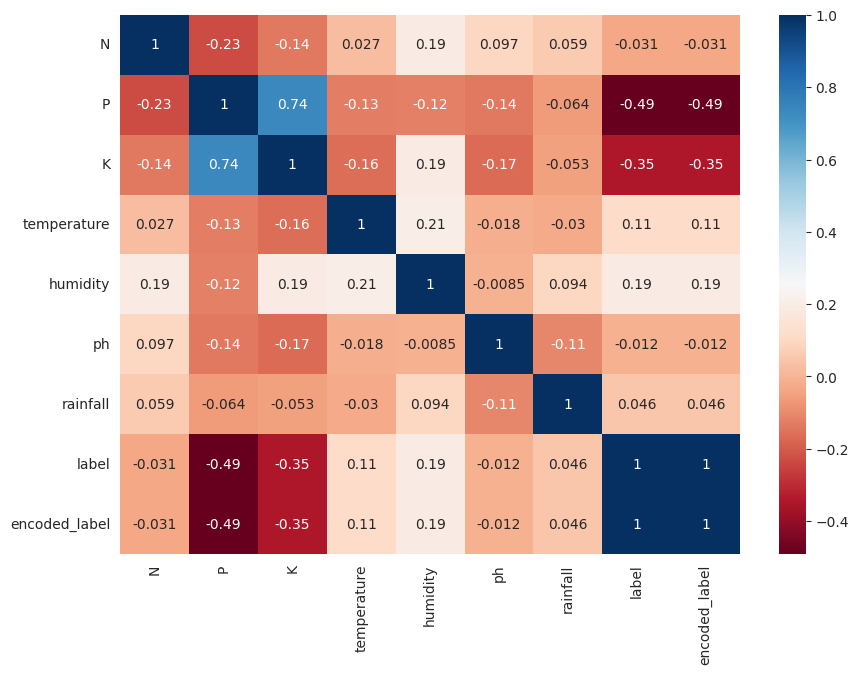

In [ ]:
encoded= LabelEncoder()
data['label']= encoded.fit_transform(data['label'])
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True,cmap='RdBu')
plt.show()

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000,21.000000


Variable Name: N
Variable Name: P
Variable Name: K
Variable Name: TEMPERATURE
Variable Name: HUMIDITY
Variable Name: PH
Variable Name: RAINFALL
Variable Name: LABEL
Variable Name: ENCODED_LABEL


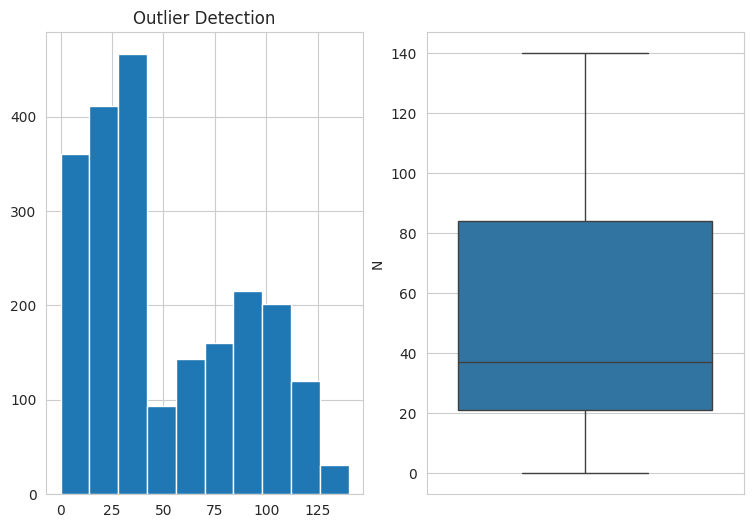

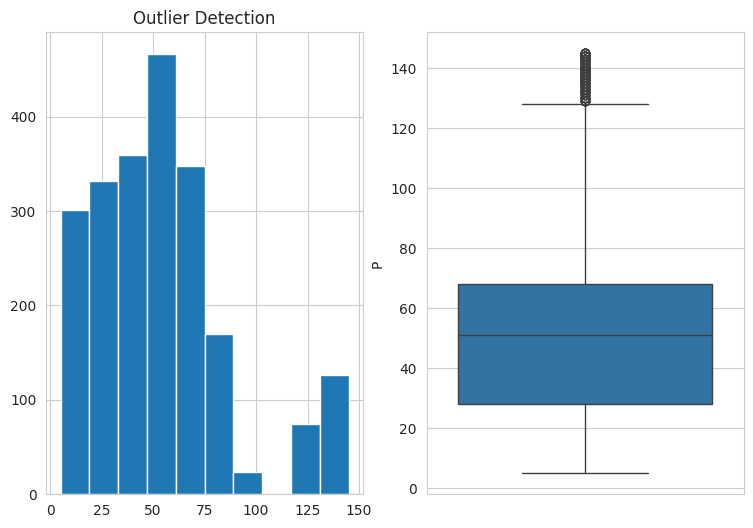

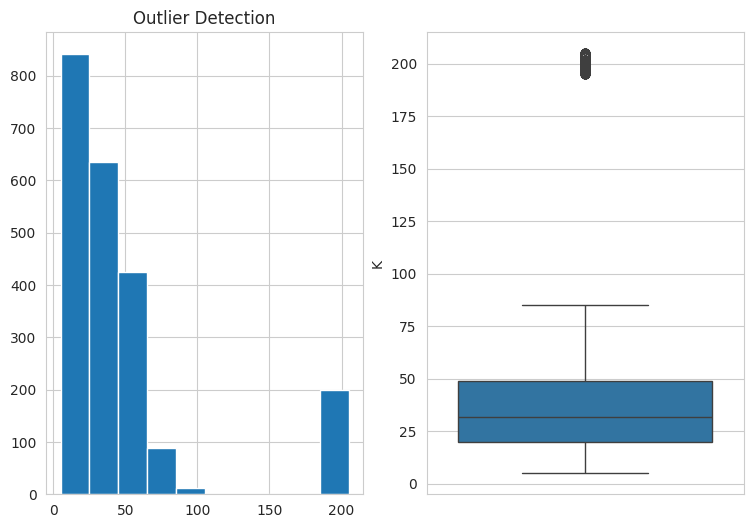

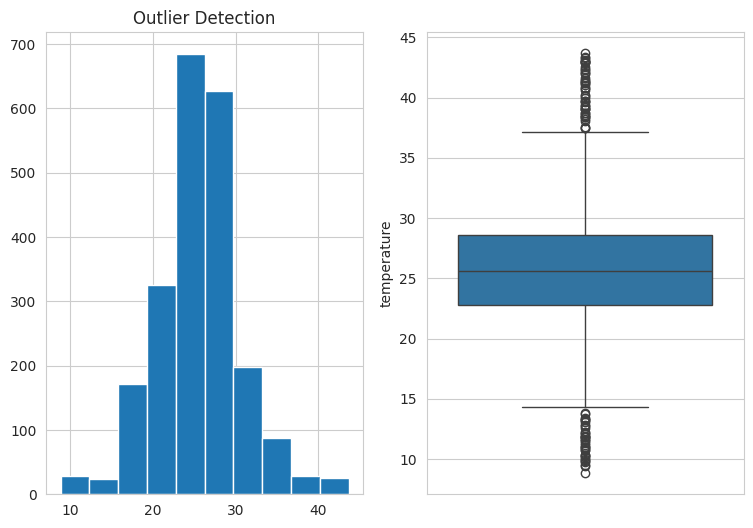

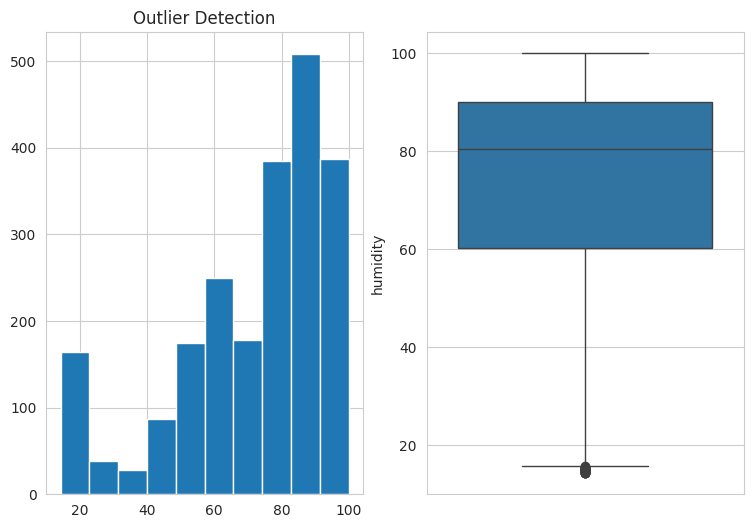

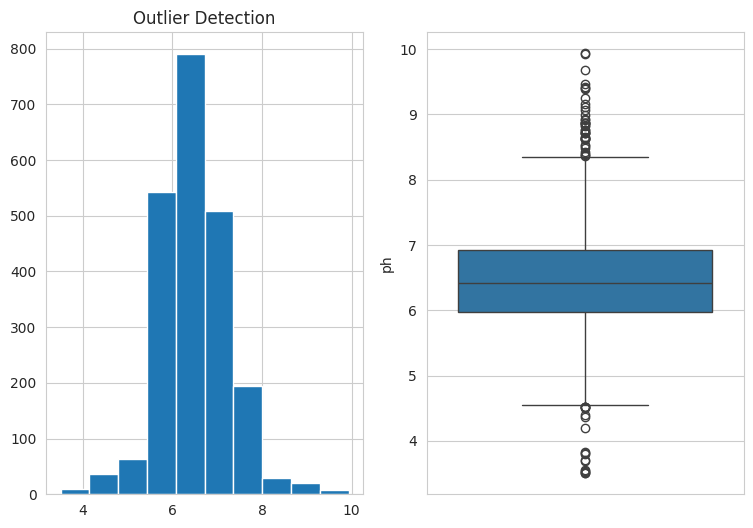

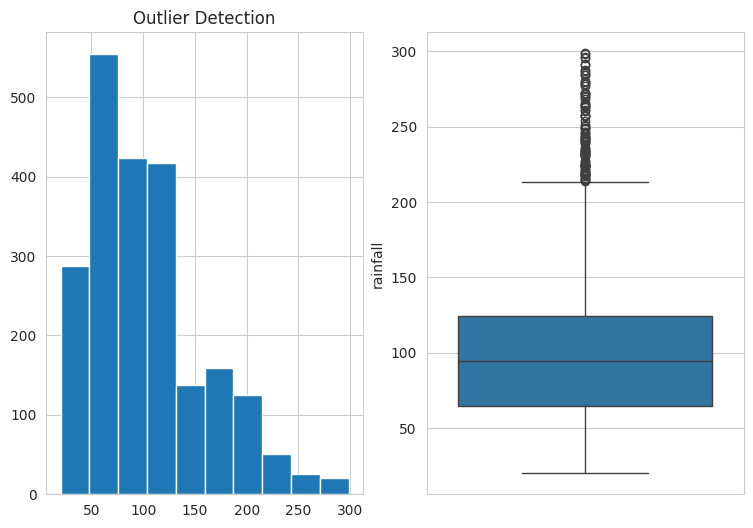

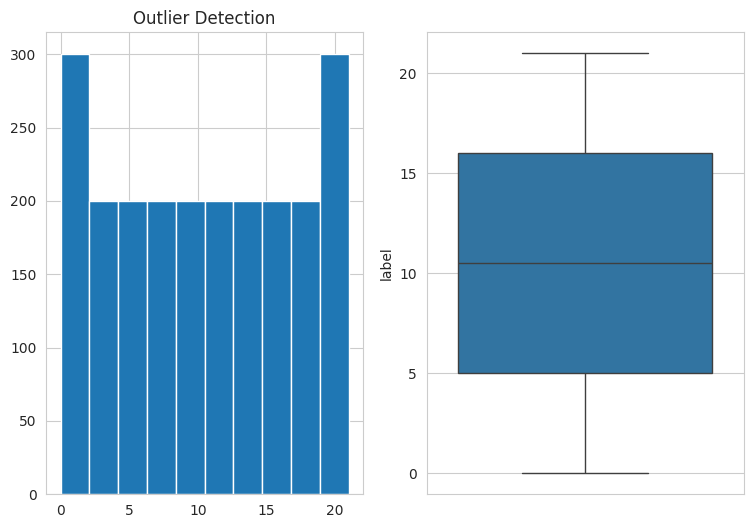

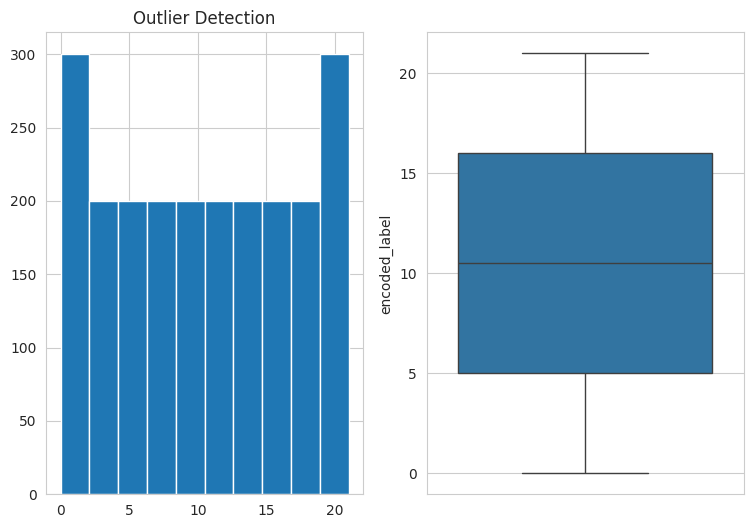

In [ ]:
for i in data.columns:
   print('Variable Name:', i.upper())
   fig, axes = plt.subplots(1,2, figsize=(9,6)) # figsize was misspelled
   axes[0].set_title('Distribution Plot')
   axes[0].set_title('Outlier Detection')
   data[i].hist(ax=axes[0])
   sns.boxplot(data[i], ax=axes[1])
   plt.show

boxplot with respect to classes

Variable : N


<ipython-input-112-36a693cc46dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.label, y=data[i],palette='rainbow')


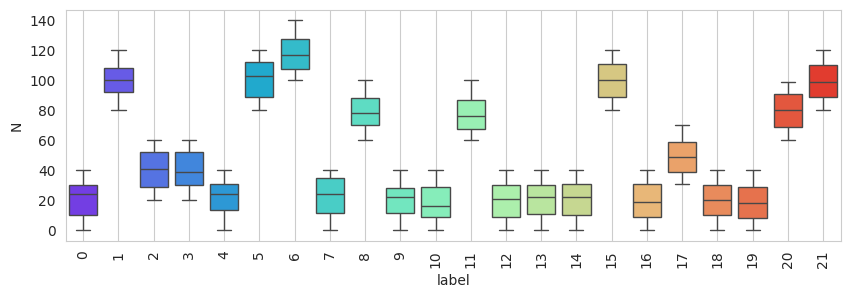

Variable : P


<ipython-input-112-36a693cc46dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.label, y=data[i],palette='rainbow')


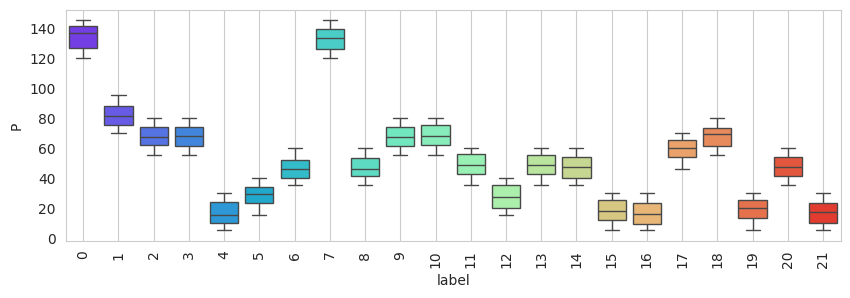

Variable : K


<ipython-input-112-36a693cc46dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.label, y=data[i],palette='rainbow')


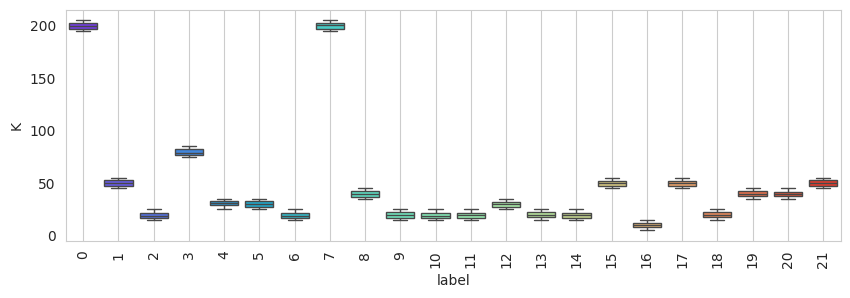

Variable : TEMPERATURE


<ipython-input-112-36a693cc46dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.label, y=data[i],palette='rainbow')


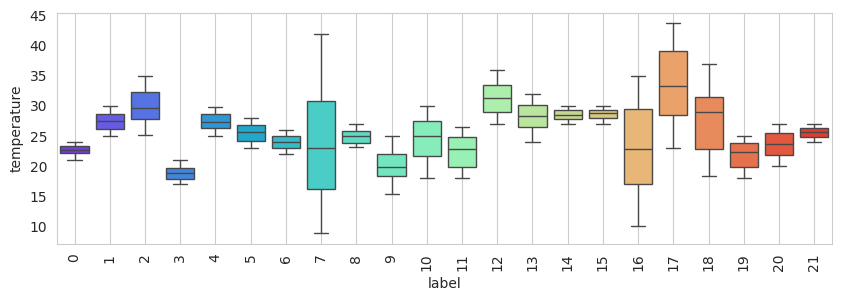

Variable : HUMIDITY


<ipython-input-112-36a693cc46dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.label, y=data[i],palette='rainbow')


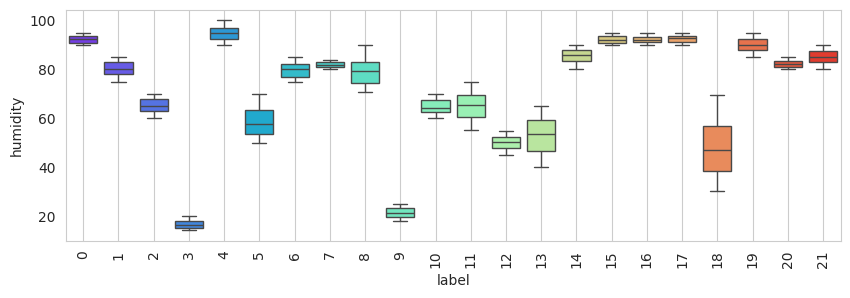

Variable : PH


<ipython-input-112-36a693cc46dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.label, y=data[i],palette='rainbow')


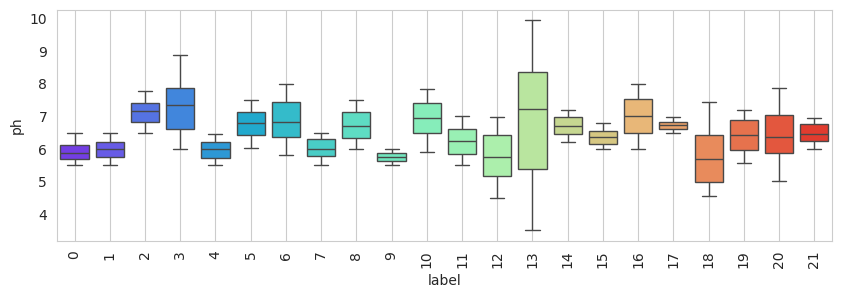

Variable : RAINFALL


<ipython-input-112-36a693cc46dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.label, y=data[i],palette='rainbow')


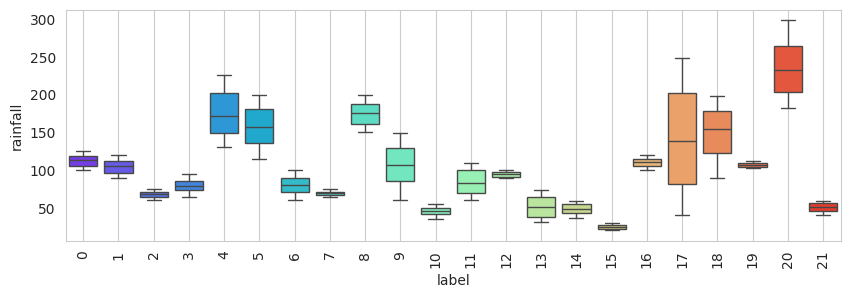

In [ ]:
for i in data .columns[:-2]:
  plt.figure(figsize=(10,3))
  print('Variable :', i.upper())
  sns.boxplot(x=data.label, y=data[i],palette='rainbow')
  sns.set_style("whitegrid")
  plt.grid()
  plt.xticks(rotation=90)
  plt.show()


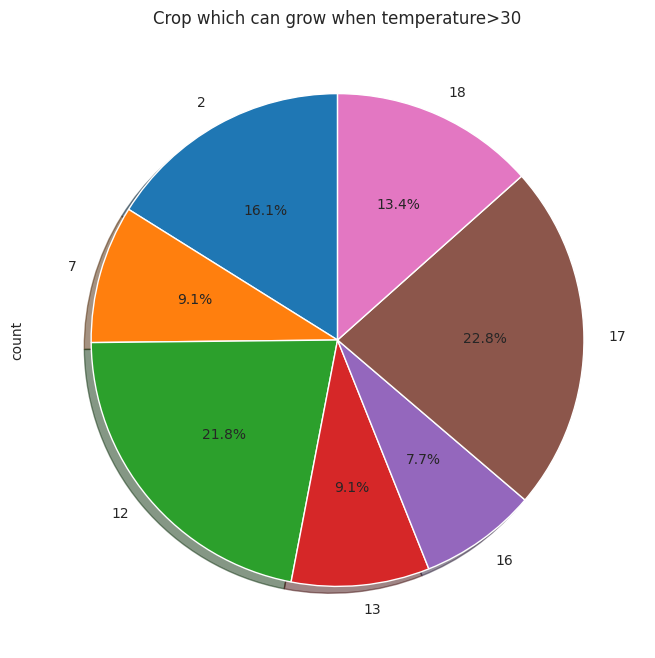

In [ ]:
x = pd.DataFrame(pd.crosstab(data.label[data.temperature>30], 'count', normalize=True)*100)
x.plot.pie(y='count', autopct='%1.1f%%', figsize=(8,8), legend=None, shadow=True,startangle=90)
plt.title('Crop which can grow when temperature>30')
plt.show()

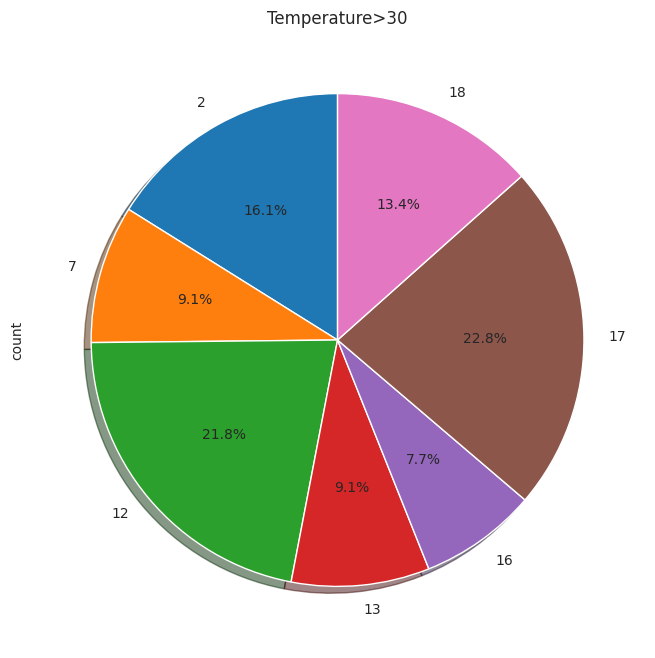

In [ ]:
x = pd.DataFrame(pd.crosstab(data.label[data.temperature>30], 'count', normalize=True)*100)
x.plot.pie(y='count', autopct='%1.1f%%', figsize=(8,8), legend=None, shadow=True,startangle=90)
plt.title('Temperature>30')
plt.show()

splitting of the variable from dataset

In [ ]:
x= data.iloc[:,:-2]
y= data.encoded_label
print('Input variables \n', x.head())
print('\noutput Variable \n', y.head())

Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

output Variable 
 0    20
1    20
2    20
3    20
4    20
Name: encoded_label, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
print('Shape of x_train:', x_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (1760, 7)
Shape of x_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
print('Shape of Splitting:')
print('x_train={}, x_test={}, y_train={}, y_test={}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting:
x_train=(1760, 7), x_test=(440, 7), y_train=(1760,), y_test=(440,)


Building Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix: 



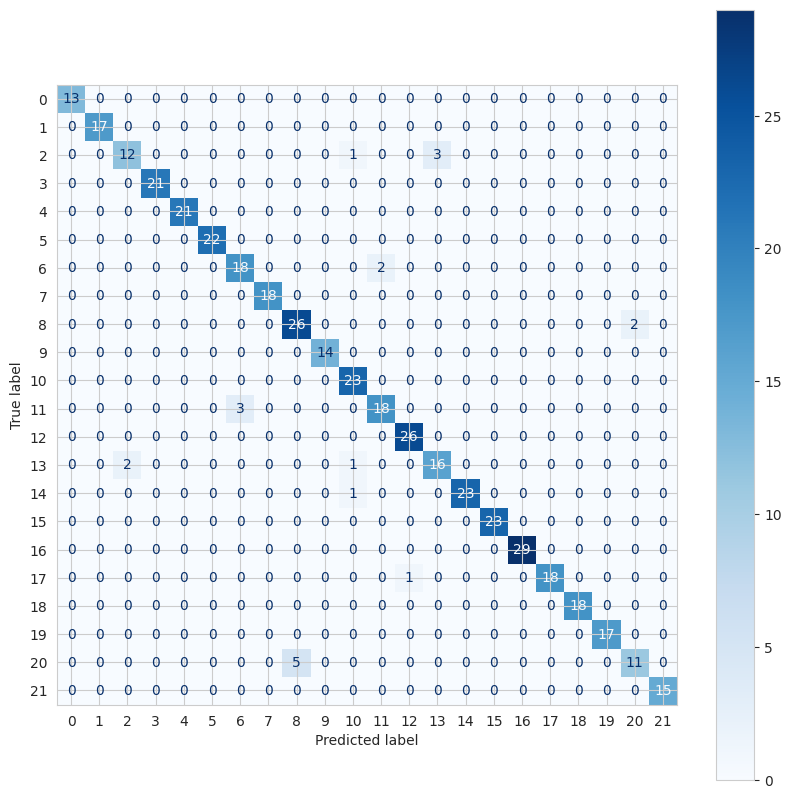

In [ ]:
#initializing the model
logis=LogisticRegression()
pred_logis=logis.fit(x_train, y_train).predict(x_test)
print('Confusion Matrix: \n')
fig, ax =plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(logis,x_test,y_test, ax=ax,cmap=plt.cm.Blues)
plt.show()